<a href="https://colab.research.google.com/github/vanoha/Test-task/blob/master/EdPro_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
import pandas as pd
import numpy as np
from math import trunc
import missingno as msno
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [180]:
surveys_df = pd.read_csv("surveys.csv", encoding='cp1251')
surveys_df.head()

,Отметка времени,cid,Понравился ли вам ролик?,Понравилась ли вам песня?,Видели ли вы ролик и/или слышали песню ранее?,Подходят ли песня и ролик друг другу?,Интересно ли вам было смотреть ролик?,Запомнился ли вам ролик?,Поделились ли бы вы роликом в социальных сетях?,Посмотрели ли бы вы ролик еще раз?,Какие эмоции вызвал у вас просмотр ролика?,"Как вы относитесь к тому, что X отстранили от участия в Y?",Как вы оцениваете решение X участвовать в Y без Z?,Оцените действия X поддержать Y клипом и песней:,Оцените свою степень заинтересованности в O:,"Кто, по вашему мнению, главный герой видеоролика?",Как вы можете охарактеризовать сюжет ролика?,Повлиял ли ролик на ваше отношение к D?,Повысил ли ролик вашу заинтересованность в Y?,Повлиял ли просмотр ролика на ваше отношению к X?,"Укажите, пожалуйста, ваш пол:",Ваш возраст:,В каком городе вы проживаете?,Ваш род деятельности,Ваш уровень дохода
0,2021/08/06 1:40:52 PM GMT+3,6bdb7694-6a66-4c5b-9925-ba601429f412,Нет,Нет,Нет,Нет,Да,Нет,Нет,Нет,Гнев;Неприязнь;Раздражение,4,10,5,7,Я,скучный;сложный для понимания;сентиментальный,Нет,Затрудняюсь ответить,Нет,Женский,26-35,Санкт-Петербург,Специалист с высшим образованием,75.000 – 100.000 рублей
1,2021/08/06 5:34:00 PM GMT+3,6ad9452a-4d4b-47e4-8c4e-447fd874c095,Нет,Да,Нет,Нет,Да,Да,Нет,Нет,Радость;Неприязнь;Раздражение,5,10,1,3,Герои спортивной хроники,насыщенный событиями;предсказуемый;сложный для...,Да,Нет,Затрудняюсь ответить,Женский,до 25,Санкт-Петербург,Специалист с высшим образованием,30.000 – 50.000 рублей
2,2021/08/09 4:29:16 PM GMT+3,1c55c119-384d-4d7b-a88c-aa33435e6166,Да,Нет,Нет,Затрудняюсь ответить,Нет,Да,Нет,Нет,Неприязнь;Раздражение;Удовлетворение,3,5,5,3,Герои спортивной хроники,насыщенный событиями;предсказуемый;сентиментал...,Нет,Нет,Нет,Женский,до 25,Санкт-Петербург,Специалист с высшим образованием,15.000 – 30.000 рублей
3,2021/08/09 4:37:31 PM GMT+3,f5f75625-b376-462f-8147-a032d26b21db,Да,Да,Нет,Да,Да,Да,Нет,Нет,Радость,1,1,10,1,Герои спортивной хроники,сентиментальный,Нет,Да,Нет,Женский,26-35,Санкт-Петербург,Специалист с высшим образованием,30.000 – 50.000 рублей
4,2021/08/09 4:39:02 PM GMT+3,d50f6426-9376-4e02-b66c-d62281ca64a3,Нет,Да,Нет,Да,Нет,Нет,Нет,Нет,Удовлетворение,2,2,7,3,Герои спортивной хроники,предсказуемый,Нет,Затрудняюсь ответить,Нет,Женский,26-35,другой город-миллионник в РФ,Специалист с высшим образованием,50.000 – 75.000 рублей


In [181]:
def surveys_norm(ans: str):
  if ans == "Да":
    return 1
  if ans == "Нет":
    return 2
  if ans == "Затрудняюсь ответить":
    return 3

Для столбцов, где есть только строки "Да", "Нет", "Затрудняюсь ответить", проведен процесс изменения строк на числа. Теперь строкам соответствуют числа: 1, 2, 3, соответсвенно.

In [182]:
cols = surveys_df.columns
for i in range(0, len(cols)):
  if (i > 1 and i < 10) or (i > 16 and i < 20):
    surveys_df[cols[i]] = surveys_df[cols[i]].apply(surveys_norm)
surveys_df.head()

,Отметка времени,cid,Понравился ли вам ролик?,Понравилась ли вам песня?,Видели ли вы ролик и/или слышали песню ранее?,Подходят ли песня и ролик друг другу?,Интересно ли вам было смотреть ролик?,Запомнился ли вам ролик?,Поделились ли бы вы роликом в социальных сетях?,Посмотрели ли бы вы ролик еще раз?,Какие эмоции вызвал у вас просмотр ролика?,"Как вы относитесь к тому, что X отстранили от участия в Y?",Как вы оцениваете решение X участвовать в Y без Z?,Оцените действия X поддержать Y клипом и песней:,Оцените свою степень заинтересованности в O:,"Кто, по вашему мнению, главный герой видеоролика?",Как вы можете охарактеризовать сюжет ролика?,Повлиял ли ролик на ваше отношение к D?,Повысил ли ролик вашу заинтересованность в Y?,Повлиял ли просмотр ролика на ваше отношению к X?,"Укажите, пожалуйста, ваш пол:",Ваш возраст:,В каком городе вы проживаете?,Ваш род деятельности,Ваш уровень дохода
0,2021/08/06 1:40:52 PM GMT+3,6bdb7694-6a66-4c5b-9925-ba601429f412,2,2,2.0,2,1,2,2,2,Гнев;Неприязнь;Раздражение,4,10,5,7,Я,скучный;сложный для понимания;сентиментальный,2,3,2,Женский,26-35,Санкт-Петербург,Специалист с высшим образованием,75.000 – 100.000 рублей
1,2021/08/06 5:34:00 PM GMT+3,6ad9452a-4d4b-47e4-8c4e-447fd874c095,2,1,2.0,2,1,1,2,2,Радость;Неприязнь;Раздражение,5,10,1,3,Герои спортивной хроники,насыщенный событиями;предсказуемый;сложный для...,1,2,3,Женский,до 25,Санкт-Петербург,Специалист с высшим образованием,30.000 – 50.000 рублей
2,2021/08/09 4:29:16 PM GMT+3,1c55c119-384d-4d7b-a88c-aa33435e6166,1,2,2.0,3,2,1,2,2,Неприязнь;Раздражение;Удовлетворение,3,5,5,3,Герои спортивной хроники,насыщенный событиями;предсказуемый;сентиментал...,2,2,2,Женский,до 25,Санкт-Петербург,Специалист с высшим образованием,15.000 – 30.000 рублей
3,2021/08/09 4:37:31 PM GMT+3,f5f75625-b376-462f-8147-a032d26b21db,1,1,2.0,1,1,1,2,2,Радость,1,1,10,1,Герои спортивной хроники,сентиментальный,2,1,2,Женский,26-35,Санкт-Петербург,Специалист с высшим образованием,30.000 – 50.000 рублей
4,2021/08/09 4:39:02 PM GMT+3,d50f6426-9376-4e02-b66c-d62281ca64a3,2,1,2.0,1,2,2,2,2,Удовлетворение,2,2,7,3,Герои спортивной хроники,предсказуемый,2,3,2,Женский,26-35,другой город-миллионник в РФ,Специалист с высшим образованием,50.000 – 75.000 рублей


In [183]:
def surveys_norm_2(sex: str):
  if sex == "Женский":
    return 1
  if sex == "Мужской":
    return 2

Для столбца "Укажите ваш пол" проведен процесс смены значений "Женский", "Мужской" на 1, 2.

In [184]:
surveys_df[cols[20]] = surveys_df[cols[20]].apply(surveys_norm_2)
surveys_df.head()

,Отметка времени,cid,Понравился ли вам ролик?,Понравилась ли вам песня?,Видели ли вы ролик и/или слышали песню ранее?,Подходят ли песня и ролик друг другу?,Интересно ли вам было смотреть ролик?,Запомнился ли вам ролик?,Поделились ли бы вы роликом в социальных сетях?,Посмотрели ли бы вы ролик еще раз?,Какие эмоции вызвал у вас просмотр ролика?,"Как вы относитесь к тому, что X отстранили от участия в Y?",Как вы оцениваете решение X участвовать в Y без Z?,Оцените действия X поддержать Y клипом и песней:,Оцените свою степень заинтересованности в O:,"Кто, по вашему мнению, главный герой видеоролика?",Как вы можете охарактеризовать сюжет ролика?,Повлиял ли ролик на ваше отношение к D?,Повысил ли ролик вашу заинтересованность в Y?,Повлиял ли просмотр ролика на ваше отношению к X?,"Укажите, пожалуйста, ваш пол:",Ваш возраст:,В каком городе вы проживаете?,Ваш род деятельности,Ваш уровень дохода
0,2021/08/06 1:40:52 PM GMT+3,6bdb7694-6a66-4c5b-9925-ba601429f412,2,2,2.0,2,1,2,2,2,Гнев;Неприязнь;Раздражение,4,10,5,7,Я,скучный;сложный для понимания;сентиментальный,2,3,2,1,26-35,Санкт-Петербург,Специалист с высшим образованием,75.000 – 100.000 рублей
1,2021/08/06 5:34:00 PM GMT+3,6ad9452a-4d4b-47e4-8c4e-447fd874c095,2,1,2.0,2,1,1,2,2,Радость;Неприязнь;Раздражение,5,10,1,3,Герои спортивной хроники,насыщенный событиями;предсказуемый;сложный для...,1,2,3,1,до 25,Санкт-Петербург,Специалист с высшим образованием,30.000 – 50.000 рублей
2,2021/08/09 4:29:16 PM GMT+3,1c55c119-384d-4d7b-a88c-aa33435e6166,1,2,2.0,3,2,1,2,2,Неприязнь;Раздражение;Удовлетворение,3,5,5,3,Герои спортивной хроники,насыщенный событиями;предсказуемый;сентиментал...,2,2,2,1,до 25,Санкт-Петербург,Специалист с высшим образованием,15.000 – 30.000 рублей
3,2021/08/09 4:37:31 PM GMT+3,f5f75625-b376-462f-8147-a032d26b21db,1,1,2.0,1,1,1,2,2,Радость,1,1,10,1,Герои спортивной хроники,сентиментальный,2,1,2,1,26-35,Санкт-Петербург,Специалист с высшим образованием,30.000 – 50.000 рублей
4,2021/08/09 4:39:02 PM GMT+3,d50f6426-9376-4e02-b66c-d62281ca64a3,2,1,2.0,1,2,2,2,2,Удовлетворение,2,2,7,3,Герои спортивной хроники,предсказуемый,2,3,2,1,26-35,другой город-миллионник в РФ,Специалист с высшим образованием,50.000 – 75.000 рублей


Используем матрицу полноты данных. Из нее видно, что лишь одно значение в датасете соответствует значению NaN.

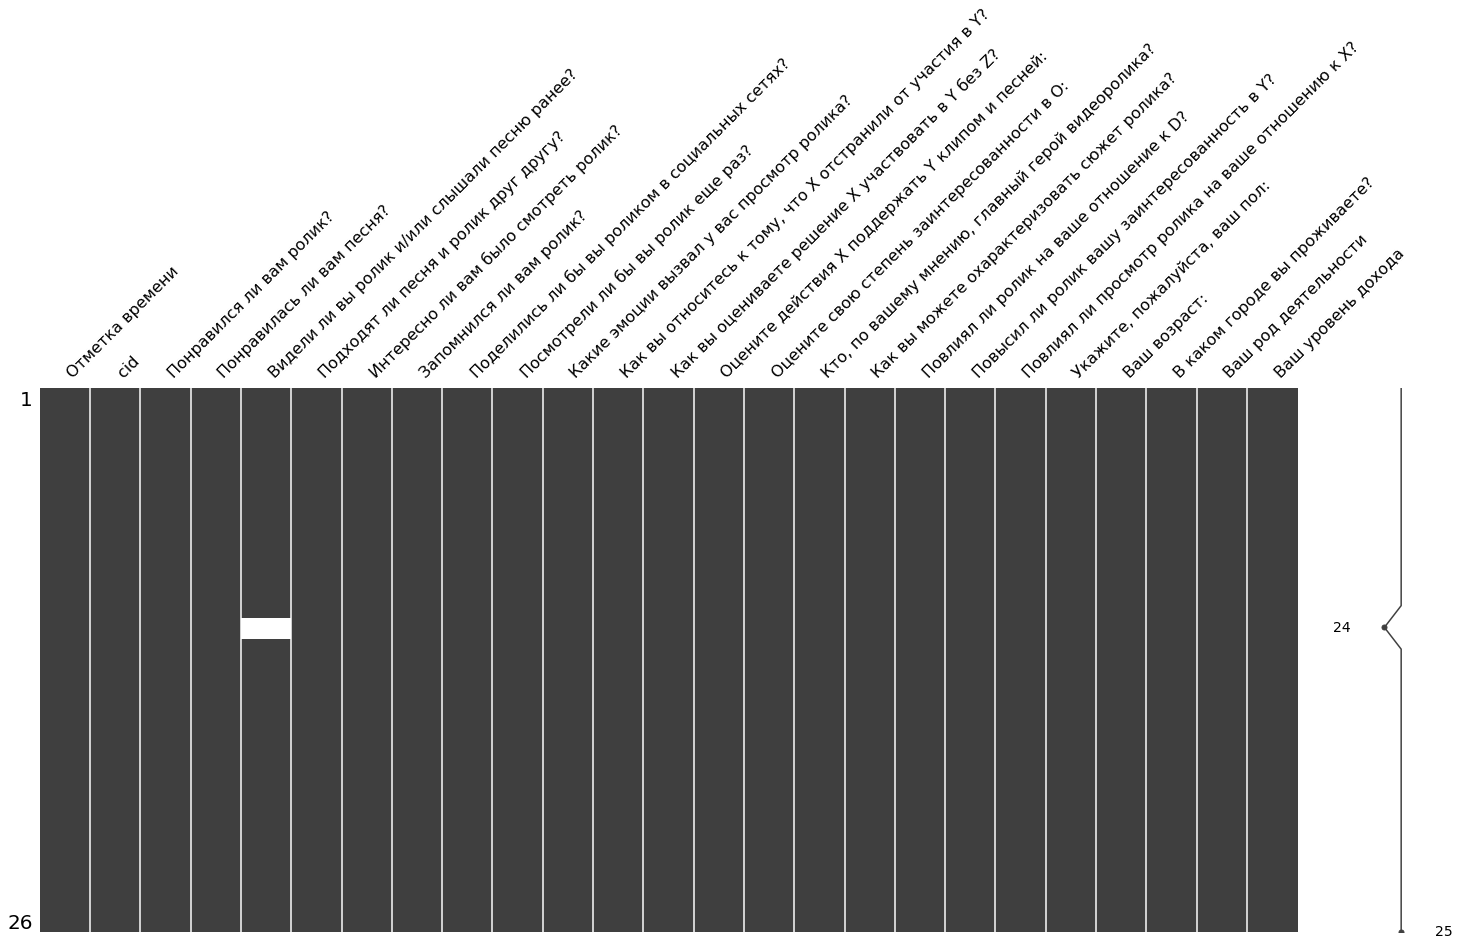

In [185]:
msno.matrix(surveys_df)

Определено количество нулевых значений в датасете. Нулевые значения отсутствуют.

In [186]:
surveys_df[surveys_df.eq(0)].stack().reset_index()

,level_0,level_1,0


**Итог:** в датасете surveys обнаружены следующие проблемы:


1.   В столбце 'Видели ли вы ролик...' присутствует одно значение NaN. Предложение по решению: так как оно одно, то его удаление не сильно повлияет на общую картину данных.
2.   В датасете присутствуют столбцы с данными типа: 'Да', 'Нет', 'Затрудняюсь ответить'. С текстовым типом данных довольно трудно работать (особеннно невозможно, если строить модель машинного обучения на этом столбце). Предложение по решению: заменить эти слова на числа типа int (это сделано выше).
3.   Со столбцом 'Укажите ваш пол' та же ситуация, что и выше. Решение такое же (сделано).
4.   Столбец 'Отметка времени' не несет какой-либо полезной информации для последующей работы с данными. Поэтому предпроложительно его можно удалить.
5.   Для данного датасета можно построить корреляционную матрицу и посмотреть, как столбцы влияют друг на друга. Далее в предобработке данных можно выяснить, стоит ли удалять некоторые столбцы. Если корреляция двух столбцов около '1', то один из них можно вполне удалить.



In [187]:
emotions_df = pd.read_csv("emotions.csv", encoding='cp1251')
emotions_df.head()

,cid,timestamps,episode,happy,angry,fear,disgusted,sad,surprised,calm,confused
0,c3b29802-e036-4e7d-bb20-d2a11fff71d7_cIsPqWk1v...,0.0,Baseline,0.594106,0.382036,0.077754,0.066719,1.036153,0.324809,96.923943,0.594490
1,c3b29802-e036-4e7d-bb20-d2a11fff71d7_cIsPqWk1v...,0.5,Baseline,0.477177,0.624077,0.165460,0.122625,2.099800,0.465126,94.175545,1.870198
2,c3b29802-e036-4e7d-bb20-d2a11fff71d7_cIsPqWk1v...,1.0,Baseline,0.658956,0.452717,0.055595,0.081949,1.401927,0.185744,96.437996,0.725110
3,c3b29802-e036-4e7d-bb20-d2a11fff71d7_cIsPqWk1v...,1.5,Baseline,0.473914,0.491457,0.094782,0.092921,1.448653,0.304347,96.233948,0.859977
4,c3b29802-e036-4e7d-bb20-d2a11fff71d7_cIsPqWk1v...,2.0,Baseline,0.431751,0.230105,0.041137,0.052600,0.581265,0.173272,98.180946,0.308920


Матрица показывает, что данные полные и в них отсутствуют пробелы.

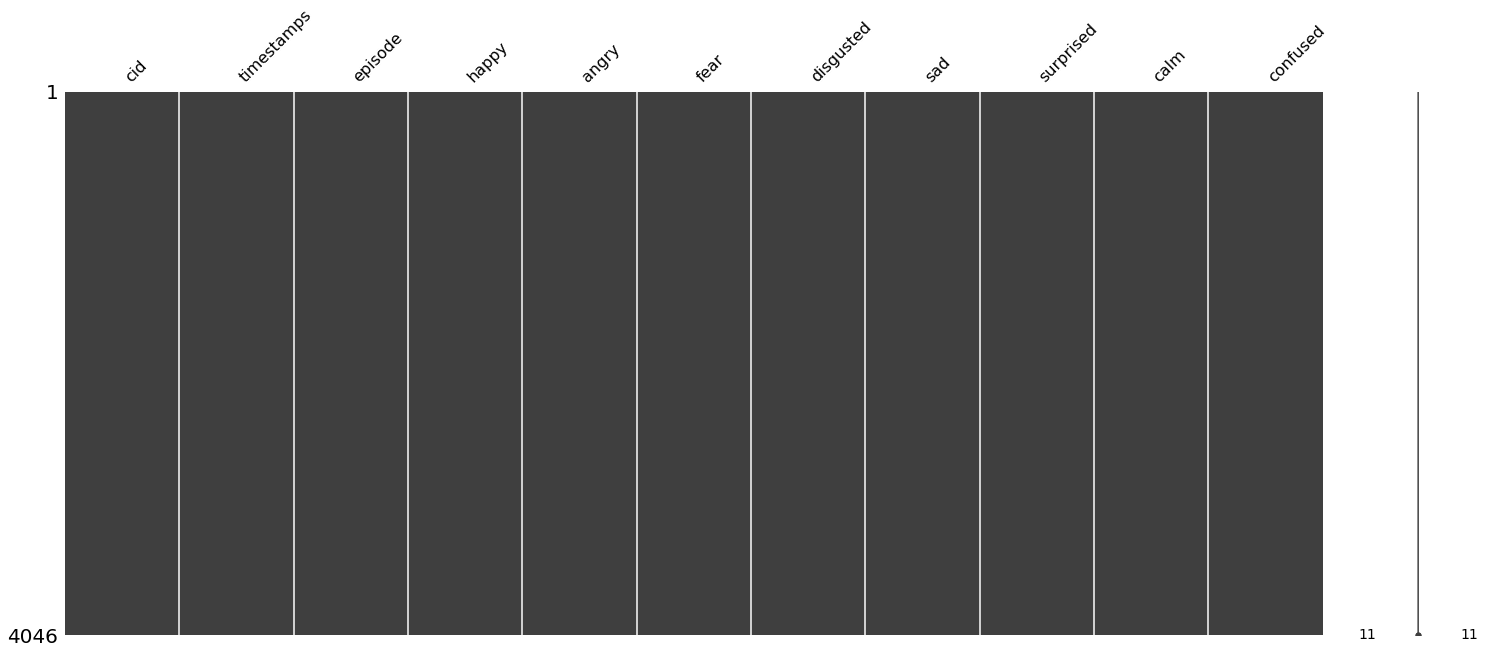

In [188]:
msno.matrix(emotions_df)

На этом шаге собраны некоторые статистические данные.

In [189]:
cols2 = emotions_df.columns
state_emotion = []
for i in range(3, len(cols2)):
    state_data = {"mean": emotions_df[cols2[i]].mean(),
                "median": emotions_df[cols2[i]].median(),
                "mode": emotions_df[cols2[i]].mode().to_list(),
                "interquartile_range": emotions_df[cols2[i]].quantile(0.75) - emotions_df[cols2[i]].quantile(0.25),
                "min": emotions_df[cols2[i]].min(),
                "max": emotions_df[cols2[i]].max(),
                }
    state_emotion.append(state_data)
  

In [190]:
quantile_list = []
for i in range(3, len(cols2)):
  print(cols2[i])
  print(emotions_df[cols2[i]].quantile(0.05))
  print(emotions_df[cols2[i]].quantile(0.95))
  quantile_list.append([emotions_df[cols2[i]].quantile(0.05), emotions_df[cols2[i]].quantile(0.95)])
  print()

happy
0.0
59.232144832611084

angry
0.0
11.230191051959991

fear
0.0
4.380674958229065

disgusted
0.0
2.65844925493002

sad
0.0
90.10044360160828

surprised
0.0
1.3007442131638527

calm
0.0
90.03364562988281

confused
0.0
23.988977178931236



Рассмотрели данные на наличие выбросов.

In [191]:
sum = [0, 0]
for i in range(3, len(cols2)):
  for j in range(0, len(emotions_df[cols2[i]])):
    if emotions_df[cols2[i]][j] <= quantile_list[i - 3][0]:
      sum[0] += 1
    if emotions_df[cols2[i]][j] >= quantile_list[i - 3][1]:
      sum[1] += 1
  print(sum)
  sum = [0, 0]

[2483, 203]
[1873, 203]
[1911, 203]
[1967, 203]
[1309, 203]
[2393, 203]
[2419, 203]
[1672, 203]


**Итог:** в датасете emotions в столбцах эмоций могут быть выбросы. Существует эвристика, по которой выбросами считаются значения, входящие в 5% крайних с обеих сторон процентов ранжированной выборки. Поэтому Однако в первые 5% во всех столбцах входят только значения равные 0. Человек может выражать полное отсутствие счастья (например), когда слушает музыкальную дорожку, поэтому я бы не стал удалять строки со значениями 0 в этих столбцах. 